In [1]:
'''
Reading basic data from iphone inputs
'''

'\nReading basic data from iphone inputs\n'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import datetime
import os
import sys
from operator import itemgetter
import random
from optparse import OptionParser
from copy import copy
import numpy as np
from scipy.stats import kstest, mstats
import string
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
# import pymc as pm


In [4]:
user_file = '../../data/iphone_responses/auth_user.csv'
dtypes = [int, string, datetime, int, string, string, string, string, int, int, datetime]

In [5]:
df_user = pd.read_csv(user_file, parse_dates=['last_login', 'date_joined'])
admin_list = ['anna', 'john', 'mbechel1', 'memorial', 'admin', 'nm175316']
df_user[df_user.username.isin(admin_list)].id

0    2
1    3
2    4
3    5
4    7
5    8
Name: id, dtype: int64

In [6]:
df_user = df_user[~df_user['username'].isin(admin_list)]

In [7]:
user_list = df_user.username.unique().tolist()

In [8]:
user_id_list = df_user[df_user.username.isin(user_list)]['id'].unique().tolist()

In [9]:
response_file = '../../data/iphone_responses/backend_patientresponse.csv'
dtypes = {'id': int, 'question_id': str, 'workday': str, 
          'response': str, 'date': str, 'patient_id': str, 'checklist_id': int, 'user_id': int}
df_response = pd.read_csv(response_file, parse_dates=['workday', 'date'])
df_response = df_response[466:]
df_response = df_response[df_response['user_id'].isin(user_id_list)]

In [10]:
# df_response.workday[df_response['user_id'] == '33']

In [11]:
#number of increasing adopters since the first date
start_date = df_response.date[466].date()
#users after each date:
user_by_days_dict = {}
for index, shift in df_response.iterrows():
    date = shift.date.date()
    days = (date - start_date).days
    #add the date to the dictionary
    if days not in user_by_days_dict.keys():
        user_by_days_dict[days] = []
    #append the user to the day
    user_by_days_dict[days].append(shift.user_id)
    #get unique ids
    user_by_days_dict[days] = list(set(user_by_days_dict[days]))


In [12]:
#adopter list:
adopter_dict = dict.fromkeys(np.arange(0, list(user_by_days_dict.keys())[-1], 1))
adopter_list = []
# for day, users in user_by_days_dict.items():
#     for user in users:
#         if user not in adopter_list:
#             adopter_list.append(user)
for day in adopter_dict.keys():
    if day in user_by_days_dict.keys():
        for user in user_by_days_dict[day]:
            if user not in adopter_list:
                adopter_list.append(user)
    adopter_dict[day] = len(adopter_list)


In [13]:
len(user_list)

48

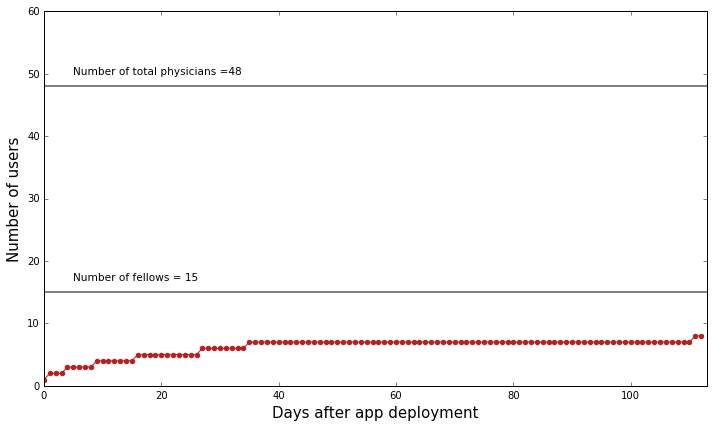

In [14]:
x = list(adopter_dict.keys())
y = list(adopter_dict.values())

fig, ax = plt.subplots(figsize=(10, 6))
font_size = 15
#plot the adopters
ax.plot(x, y, color='firebrick')
ax.scatter(x, y, color='firebrick')
#plot the max adopter line
ax.axhline(y=len(user_list), color='gray', lw=2)
ax.axhline(y=15, color='gray', lw=2)
ax.text(5, 50, 'Number of total physicians =48', fontsize=.7*font_size)
ax.text(5, 17, 'Number of fellows = 15', fontsize=.7*font_size)
#set axis
ax.set_xlim(0, list(user_by_days_dict.keys())[-1])
ax.set_ylim(0, 60)
#set axis label
ax.set_xlabel('Days after app deployment', fontsize=font_size)
ax.set_ylabel('Number of users', fontsize=font_size)
#savefigure
plt.tight_layout()
plt.savefig('../../result/iphoneapp/useroverdays_120516.png', transparent=True)
# plt.savefig('../../result/iphoneapp/useroverdays.pdf', transparent=True)

## Frequency 

In [15]:
file_timeentry = '../../data/iphone_responses/backend_tmetryentry.csv'
dtypes = [str, datetime, str, str, str, int]
df_timeentry = pd.read_csv(file_timeentry, parse_dates=['date'])
#start on August 1, 2016
df_timeentry = df_timeentry[2004:]
#REMOVE NULL ROWS IN VALUE -> NULLS ARE made for beaconstatus which is not ready yet
df_timeentry = df_timeentry[(df_timeentry.value.notnull())]
# admin_list = ['admin', 'anna', 'john', 'memorial', 'nm175316', '[mbechel']
admin_list= [2,3,4,5,7,8]
df_timeentry = df_timeentry[~df_timeentry.user_id.isin(admin_list)]

In [16]:
df_timeentry.groupby(['object']).count()

,id,date,action,value,user_id
object,,,,,
C: AmaralLogin,18380,18380,18380,18380,18380
C: CernerAuthenticate,8010,8010,8010,8010,8010
C: CernerObtainToken,8891,8891,8891,8891,8891
C: Login,4330,4330,4330,4330,4330
C: PatientDetail,219299,219299,219299,219299,219299
C: PatientList,43398,43398,43398,43398,43398
W: AmaralLogin,8,8,8,8,8
W: Login,1,1,1,1,1


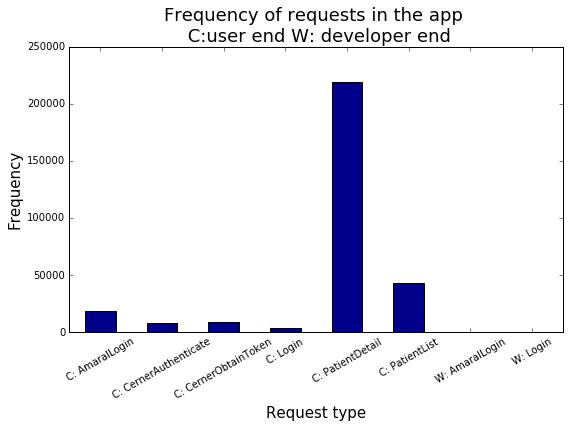

In [18]:
font_size = 15

df_temp1 = df_timeentry.groupby(['object']).count().id
ax = df_temp1.plot(kind='bar', figsize=(8,6), color = 'Darkblue', rot=30)
ax.set_xlabel('Request type', fontsize=font_size)
ax.set_ylabel('Frequency', fontsize=font_size)
ax.set_title('Frequency of requests in the app \n C:user end W: developer end', fontsize=1.2*font_size)

plt.tight_layout()
plt.savefig('../../result/iphoneapp/frequency_object_120516.png', transparent=True)

In [19]:
df_timeentry[df_timeentry.object == 'C: PatientDetail'].groupby(['action']).count()

,id,date,object,value,user_id
action,,,,,
Answer,70938,70938,70938,70938,70938
EMRInfoExpanded,43603,43603,43603,43603,43603
EMRInfoHidden,40626,40626,40626,40626,40626
Load,1330,1330,1330,1330,1330
ShowGroup,62802,62802,62802,62802,62802


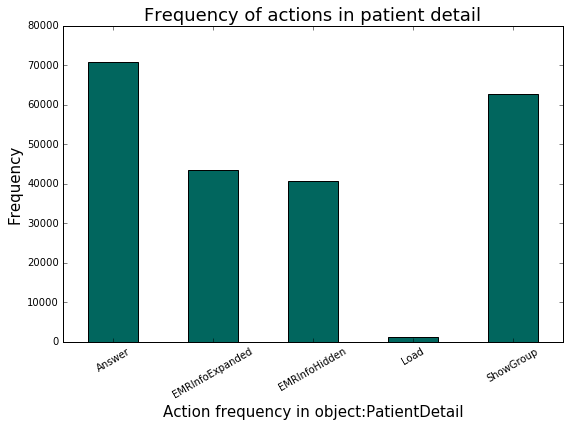

In [20]:
df_temp2 = df_timeentry[df_timeentry.object == 'C: PatientDetail'].groupby(['action']).count().id
ax = df_temp2.plot(kind='bar', figsize=(8,6), color = '#01665e', rot = 30)
ax.set_xlabel('Action frequency in object:PatientDetail', fontsize=font_size)
ax.set_ylabel('Frequency', fontsize=font_size)
ax.set_title('Frequency of actions in patient detail', fontsize=1.2*font_size)

plt.tight_layout()
plt.savefig('../../result/iphoneapp/frequency_action_patietdetail_120516.png', transparent=True)

In [21]:
df_timeentry[df_timeentry.action == 'EMRInfoExpanded'].groupby(['value']).count()

,id,date,object,action,user_id
value,,,,,
ANTIBIOTICS,6680,6680,6680,6680,6680
DVT,11775,11775,11775,11775,11775
LINES_FOOD,14460,14460,14460,14460,14460
PRESSURE_ULCERS,8386,8386,8386,8386,8386
VENTILATOR_WEANING,2302,2302,2302,2302,2302


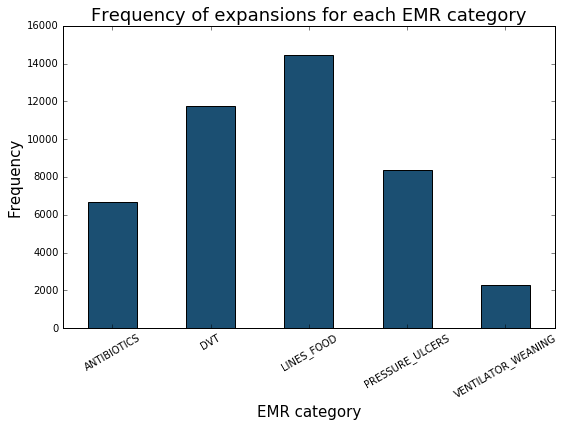

In [22]:
df_temp3 = df_timeentry[df_timeentry.action == 'EMRInfoExpanded'].groupby(['value']).count().id
ax = df_temp3.plot(kind='bar', figsize=(8,6), color = '#1B4F72', rot = 30)
ax.set_xlabel('EMR category', fontsize=font_size)
ax.set_ylabel('Frequency', fontsize=font_size)
ax.set_title('Frequency of expansions for each EMR category', fontsize=1.2*font_size)

plt.tight_layout()
plt.savefig('../../result/iphoneapp/frequency_action_emrinfo_120516.png', transparent=True)

In [23]:
df_timeentry[df_timeentry.action == 'ShowGroup'].groupby(['value']).count()

,id,date,object,action,user_id
value,,,,,
01,7741,7741,7741,7741,7741
03,13933,13933,13933,13933,13933
06,10796,10796,10796,10796,10796
07,13375,13375,13375,13375,13375
08,15088,15088,15088,15088,15088
10,1869,1869,1869,1869,1869


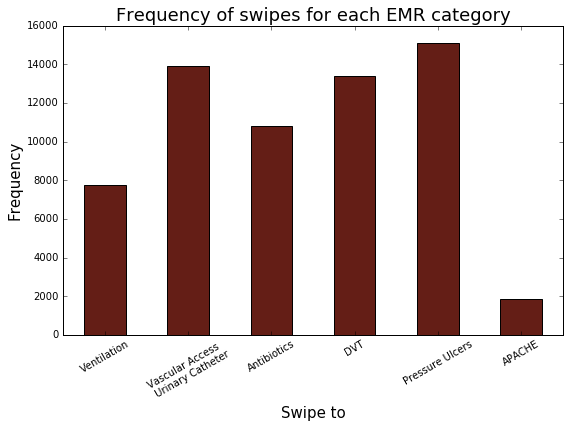

In [24]:
df_temp4 = df_timeentry[df_timeentry.action == 'ShowGroup'].groupby(['value']).count().id
ax = df_temp4.plot(kind='bar', figsize=(8,6), color = '#641E16', rot = 30)
ax.set_xlabel('Swipe to', fontsize=font_size)
ax.set_ylabel('Frequency', fontsize=font_size)
#changeing the lables. {01: Ventilation, 03: Vascular, 06: Antibiotics, 07: DVT, 08: PRessure_ulcers, 10: Apache}
tick_labels = ['Ventilation', 'Vascular Access \n Urinary Catheter', 'Antibiotics', 'DVT', 'Pressure Ulcers', 'APACHE']
ax.set_xticklabels(tick_labels)
ax.set_title('Frequency of swipes for each EMR category', fontsize=1.2*font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/frequency_action_swipe_120516.png', transparent=True)

## Most frequently answered questions 

In [25]:
df_answer = df_response.question_id


In [34]:
physicians_answered_questions = sorted((df_answer.user_id.unique().tolist()))
physicians_used_app = sorted(df_timeentry.user_id.unique().tolist())
physicians_used_info = sorted([doc for doc in physicians_used_app if doc not in physicians_answered_questions])
physicians_not_used_app = sorted([doc for doc in user_id_list if doc not in physicians_used_app])

print('Physicians who have used and answered the questions: ', physicians_answered_questions)
print('Physicians who only used the emr info: ', physicians_used_info)
print('Physicians who never used the app: ', physicians_not_used_app)
print('Physicians in the response table: ', sorted(df_response.user_id.unique().tolist()))


AttributeError: 'Series' object has no attribute 'user_id'

In [42]:
df_answer[df_answer.value.split()[2] == 'Q:0102']

AttributeError: 'Series' object has no attribute 'value'

In [43]:
#see how may times each question was answered
answer_dictionary = {}

for question_id in df_answer:
    if '$' in question_id:
        question_id = question_id[1:]
    if question_id not in answer_dictionary.keys():
        answer_dictionary[question_id] = 0
    answer_dictionary[question_id] += 1


In [44]:
answer_dictionary

{'0101': 151,
 '0102': 32,
 '0201': 127,
 '0202': 82,
 '0203': 44,
 '0204': 1,
 '0301': 412,
 '0401': 393,
 '0501': 421,
 '0601': 311,
 '0701': 403,
 '0702': 433,
 '0801': 426}

In [45]:
#['0101', '0102', '0201', '0202', '0203', '0301', '0401', '0501', '0601', '0701', '0702', '0801']
question_id_match_explanation = ['SAT \n performed?','SAT \n appropriate?', 'SBT \n performed?', \
                                 'Can \n extubate?', 'SBT \n appropriate?', \
                                 'Remove \n central venous?','Remove \n urinary catheter?', \
                                 'Increase \n nutrition?', 'Less \n antibiotics?', \
                                 'DVT \n chemoprophylaxis?', 'Increase \n mobility?', \
                                 'Pressure \n ulcers?']

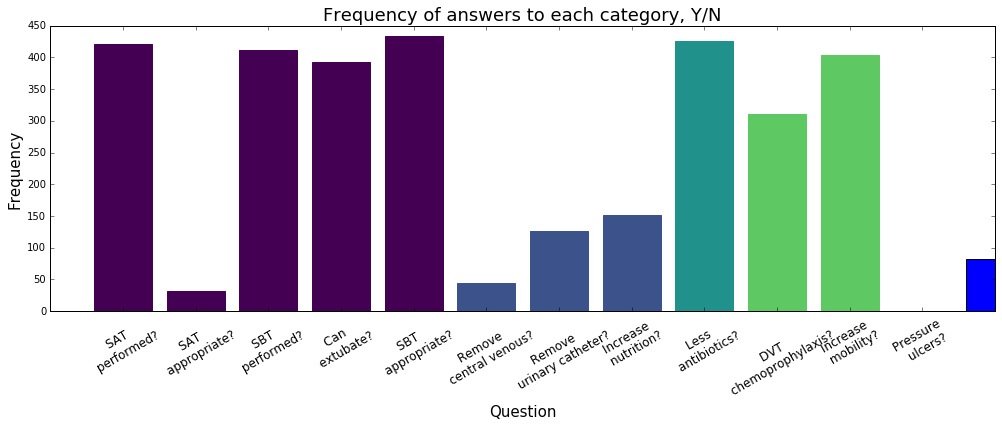

In [46]:
fig, ax = plt.subplots(figsize=(14, 6))
font_size = 15

barlist = plt.bar(range(len(answer_dictionary)), answer_dictionary.values(), align='center')

#bar colors different fo different group
colorlist = plt.cm.viridis(np.linspace(0,1,5))
barlist[0].set_color(colorlist[0])
barlist[1].set_color(colorlist[0])
barlist[2].set_color(colorlist[0])
barlist[3].set_color(colorlist[0])
barlist[4].set_color(colorlist[0])
barlist[5].set_color(colorlist[1])
barlist[6].set_color(colorlist[1])
barlist[7].set_color(colorlist[1])
barlist[8].set_color(colorlist[2])
barlist[9].set_color(colorlist[3])
barlist[10].set_color(colorlist[3])
barlist[11].set_color(colorlist[4])


plt.xticks(range(len(answer_dictionary)), question_id_match_explanation, rotation=30, fontsize=0.8*font_size)
plt.xlim([-1, 12])
plt.tight_layout()
plt.ylabel('Frequency', fontsize=font_size)
plt.xlabel('Question', fontsize=font_size)
plt.title('Frequency of answers to each category, Y/N', fontsize=1.2*font_size)
plt.tight_layout()
plt.savefig('../../result/iphoneapp/frequency_answer_group_111816.png', transparent=True)